In [1]:
#Notebook format allows for quick changes to individual parts of the plots

#Import declarations... re-run when more are added
import pandas as pd
import scipy.signal as sig
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)
from scipy.fft import fft, ifft, fftfreq

In [2]:
#Data import

ff = np.genfromtxt('fanless_filter_test.csv', delimiter=',', dtype=float) #dataset contains no fan noise

#ff = np.genfromtxt('rate_testing.csv', delimiter=',', dtype=float) #dataset contains fan noise
ff = ff[1:,:]
ff_acc = np.sqrt(np.square(ff[:, 1])+np.square(ff[:, 2])+np.square(ff[:, 3]))

time_vec = ff[:, 0]
N = len(ff_acc)#number of samples in the dataset

In [3]:
#Define filtering parameters

sample_rate = 20 #sampling frequency in Hz
nyq = sample_rate/2 #effective nyquist frequency, half of sampling rate
T = 1/sample_rate
tt = np.linspace(0, N/sample_rate, N, endpoint=False)


In [4]:
#Implement filters

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


Text(0.5, 0, 'Time (s)')

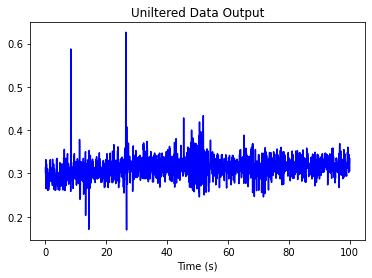

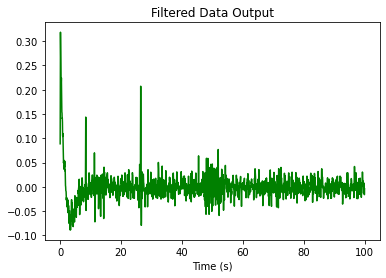

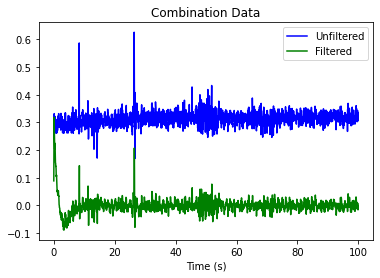

In [5]:
#Filter data and replot to view

#### USER DEFINED
low_cutoff =  0.1
hi_cutoff = 5
###==============

plt.figure(1)
plt.plot(tt, ff_acc, c='b')
plt.title('Uniltered Data Output')
plt.xlabel('Time (s)')

plt.figure(2)
yy = butter_bandpass_filter(ff_acc, low_cutoff+.00000001, hi_cutoff-.000000001, sample_rate, 2)
plt.plot(tt, yy, c='g')
plt.title('Filtered Data Output')
plt.xlabel('Time (s)')

fig3 = plt.figure(3)
ax1 = fig3.add_subplot(1,1,1)
ax1.plot(tt, ff_acc, c = 'b', label='Unfiltered')
ax1.plot(tt, yy, c = 'g', label='Filtered')
plt.legend(loc='upper right')
plt.title('Combination Data')
plt.xlabel('Time (s)')

Text(0.5, 1.0, 'FFT of input data')

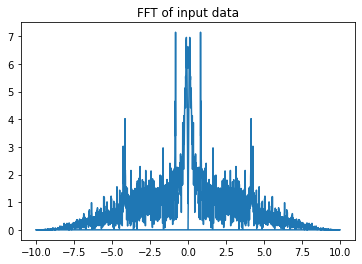

In [6]:
# fourier transform of the filtered data
fyy = fft(yy)
xf = fftfreq(N, 1/sample_rate)
plt.plot(xf, np.abs(fyy))
plt.title('FFT of input data')


In [7]:
#begin testing with the integration functions. How does the data look here? Theoretically, filtered data will be a smoother or more controlled path. In the case of stationary, calibration data, the motion should be negligible
import scipy.integrate as it

time_v = ff[:,0]
x = ff[:,1]
y = ff[:,2]
z = ff[:,3]

vx = []
vy = []
vz = []
sx = []
sy = []
sz = []

'''
for ii in range(N):
    vx.append(it.trapz( x[ii:ii+1], x=time_v[ii:ii+1]))
    vy.append(it.trapz( y[ii:ii+1], x=time_v[ii:ii+1]))
    vz.append(it.trapz( z[ii:ii+1], x=time_v[ii:ii+1]))
'''

sx = it.cumtrapz(it.cumtrapz(x, time_v))
sy = it.cumtrapz(it.cumtrapz(y, time_v))
sz = it.cumtrapz(it.cumtrapz(z, time_v))

'''
vx = np.array(vx)
vy = np.array(vy)
vz = np.array(vz)

print(f' vel shape:{vx.shape}, pos shape{x.shape}, time shape: {time_v.shape}')
print(f' vel shape:{vy.shape}, pos shape{y.shape}, time shape: {time_v.shape}')
print(f' vel shape:{vz.shape}, pos shape{z.shape}, time shape: {time_v.shape}')

sx = it.cumtrapz( vx, x=time_v, initial=0)
sy = it.cumtrapz( vy, x=time_v, initial=0)
sz = it.cumtrapz( vz, x=time_v, initial=0)
'''

"\nvx = np.array(vx)\nvy = np.array(vy)\nvz = np.array(vz)\n\nprint(f' vel shape:{vx.shape}, pos shape{x.shape}, time shape: {time_v.shape}')\nprint(f' vel shape:{vy.shape}, pos shape{y.shape}, time shape: {time_v.shape}')\nprint(f' vel shape:{vz.shape}, pos shape{z.shape}, time shape: {time_v.shape}')\n\nsx = it.cumtrapz( vx, x=time_v, initial=0)\nsy = it.cumtrapz( vy, x=time_v, initial=0)\nsz = it.cumtrapz( vz, x=time_v, initial=0)\n"

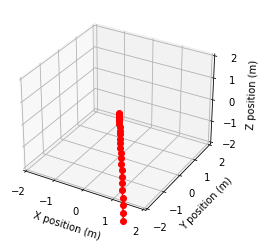

In [8]:
#plotting the integrated position terms


#from ipywidgets import interact, interactive, fixed, interact_manual
plt.ion()

fig1 = plt.figure(1)
ax1 = fig1.gca(projection='3d')

ax1.clear()
ax1.plot3D(sx, sy, sz, c='red',marker="o")
ax1.set_xlabel('X position (m)')
ax1.set_ylabel('Y position (m)')
ax1.set_zlabel('Z position (m)')
ax1.set_xlim3d([-2. , 2.])
ax1.set_ylim3d([-2. , 2.])
ax1.set_zlim3d([-2. , 2.])
ax1.set_autoscale_on(False)
